## 결정트리

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head(2)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


In [ ]:
wine.info()
# 데이터 타입 중 object가 있으면 의심해야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
# 결측치 확인
wine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [ ]:
wine.describe()
# 평균과 중위수를 확인 > 이상치 존재 확인
# 자연스럽게 수치혇ㅇ 데이터에 대한 정보를 얻을 수 있다.(컬럼)

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# 해당 데이터에 대해 로직스틱 회귀를 적용한 경우
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 모델 생성
lr = LogisticRegression()

# 데이터 분할
# 1) X와 y를 분리
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]
# 2) 학습용 평가용으로 나눔
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=25,test_size=0.2)

# 데이터 표준화
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# 학습
lr.fit(X_train_scaled, y_train)

# 평가(학습용, 평가용) - 과적합 여부 확인 - 일반화하기 위해서
lr.score(X_train_scaled,y_train), lr.score(X_test_scaled,y_test)

(0.7773715605156821, 0.7930769230769231)

In [ ]:
lr.coef_, lr.intercept_

(array([[ 0.48224432,  1.58340099, -0.70532308]]), array([1.75454423]))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

dt.score(X_train_scaled,y_train), dt.score(X_test_scaled, y_test)

(0.9978833942659227, 0.8615384615384616)

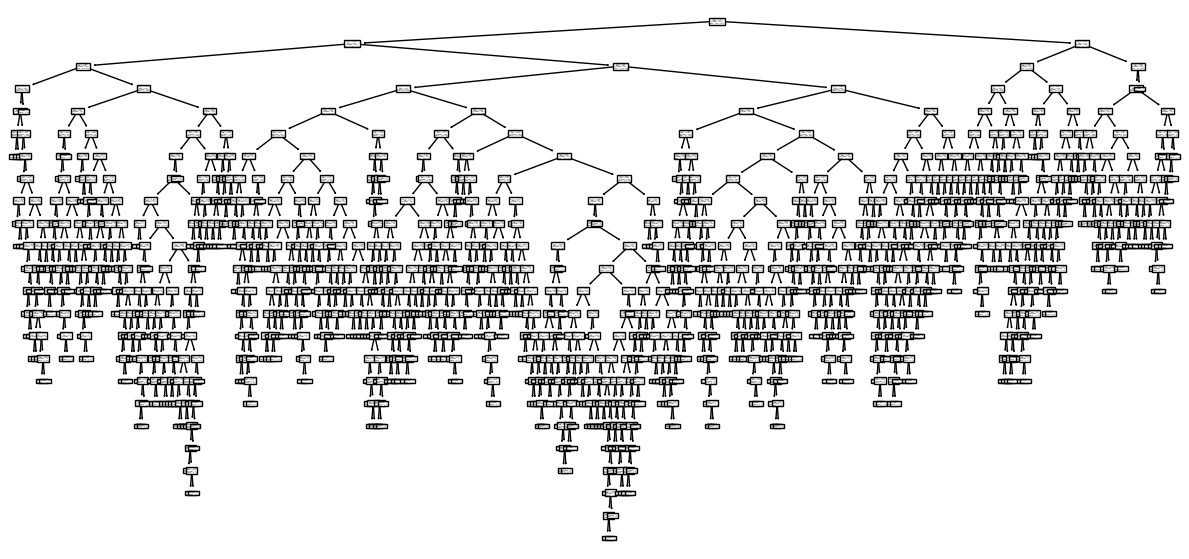

In [ ]:
# 위의 결과에서 과적합을 의심할 수 있음
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 트리 노드 그리기
plt.figure(figsize=(15,7))
plot_tree(dt)
plt.show()

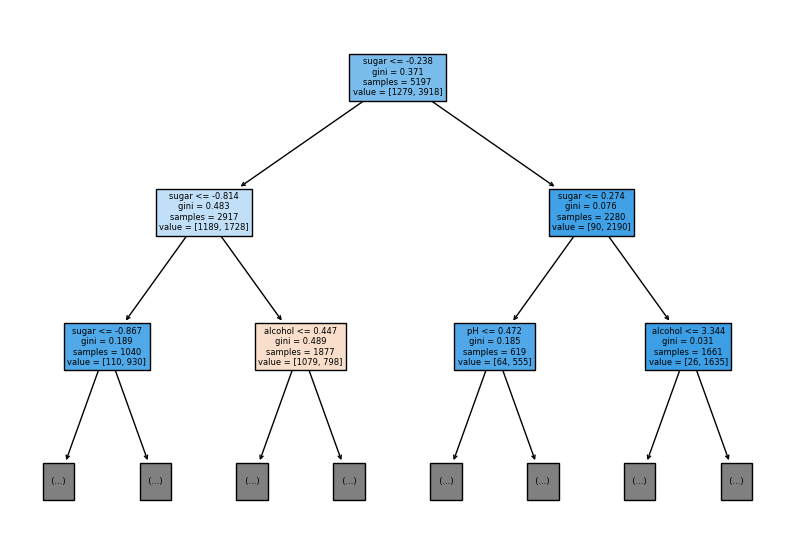

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

지니계수(Gini index)
- 특정 노드에서 데이터가 얼마나 잘 분류되는지 측정 지표
- 분순도를 나타낸다 : 값이 낮을수록 순도가 높다
- 결정트리는 이 지니 계수를 최소화하는 방향으로 데이터를 분할
$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

$p_i^2$는 특정 노드에서 클래스 i에 속하는 샘플의 비율

결정트리에서 규제는 가지치기 : depth를 낮춘다

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.24615384615384617
[0.25163417 0.50351205 0.24485378]


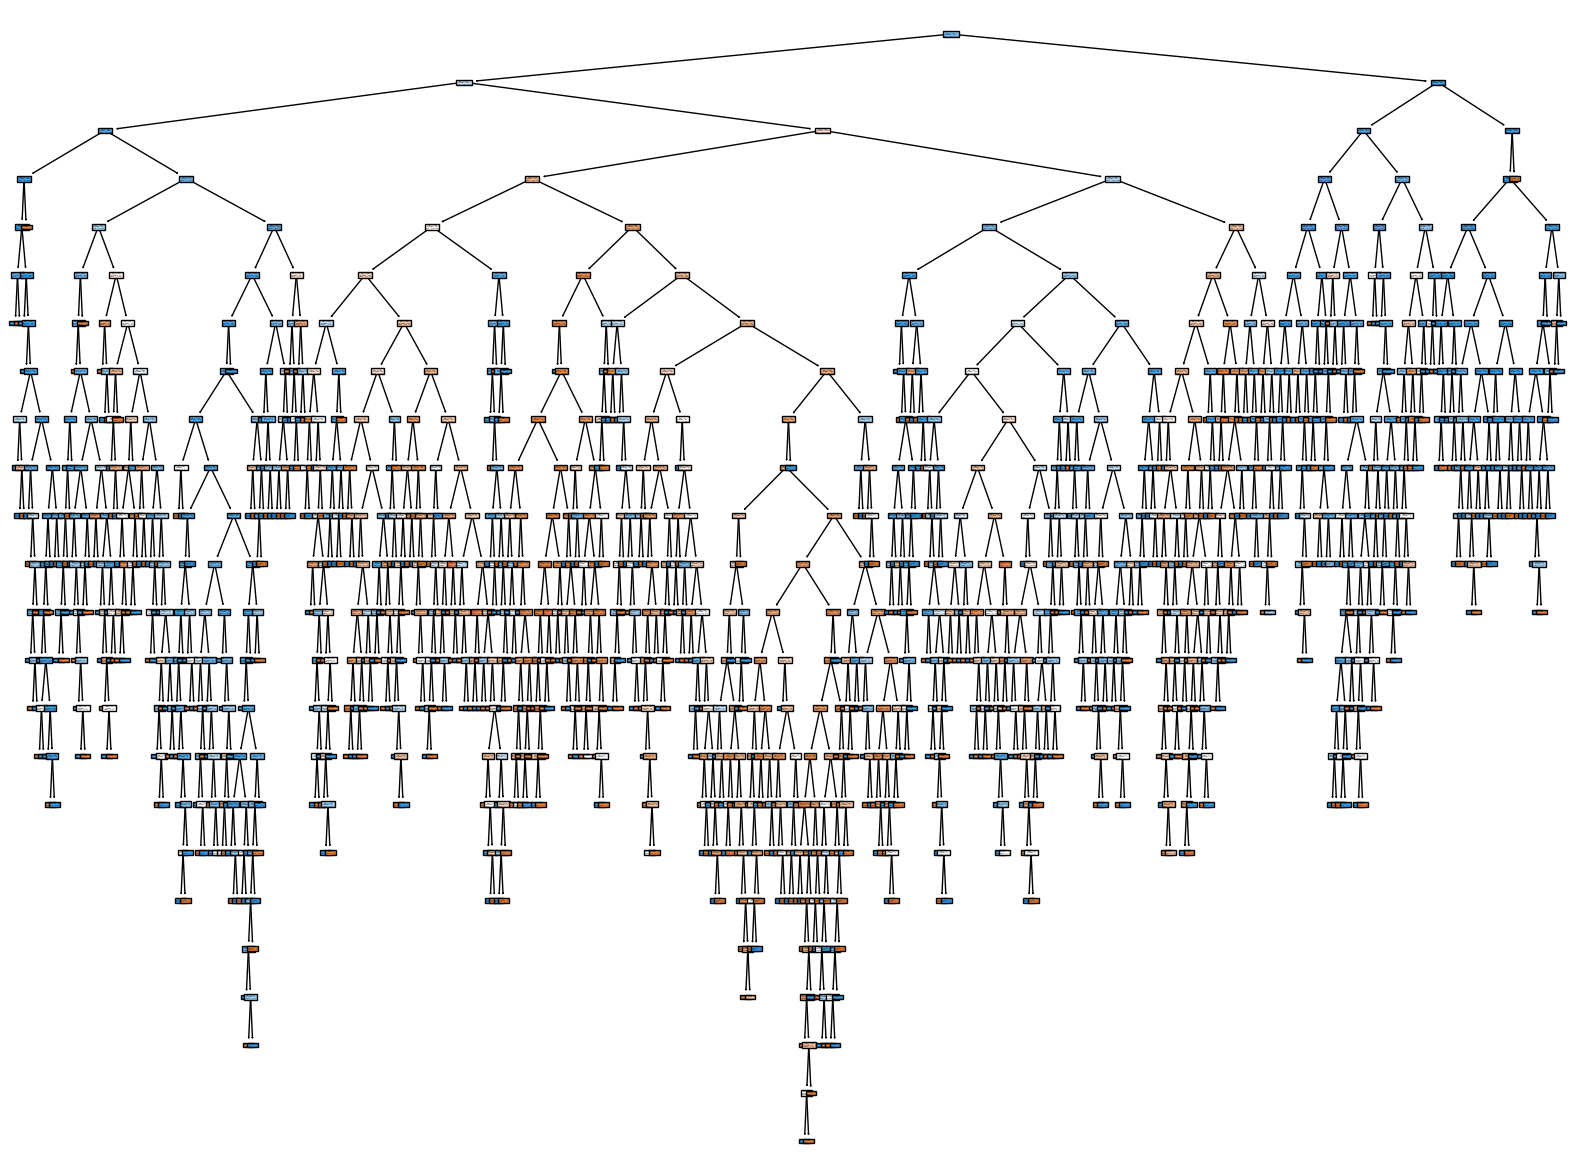

In [ ]:
# 스케일 조정하지 않은 데이터 사용
df=DecisionTreeClassifier(max_depth=3, random_state=42)
df.fit(X_train, y_train)
print(dt.score(X_test, y_test))

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
print(dt.feature_importances_)

In [ ]:
# 결정트리는 학습과정에서 필수적으로 주어진 특성들의 중요도를 알려줌
dt = DecisionTreeClassifier()
dt.fit(X,y) # 전체데이터
pd.DataFrame([dt.feature_importances_], columns=X.columns.values)

,alcohol,sugar,pH
0,0.242392,0.502393,0.255215


In [ ]:
# 훈련 세트(train) , 검증 세트(val) - 자주 하는 검증, 테스트 세트(test) - 마지막 검증

교차검증
- 우연에 의한 일반화 오류를 방지
- 여러번 성능 테스트에 의한 평균

In [ ]:
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
X,y

(      alcohol  sugar    pH
 0         9.4    1.9  3.51
 1         9.8    2.6  3.20
 2         9.8    2.3  3.26
 3         9.8    1.9  3.16
 4         9.4    1.9  3.51
 ...       ...    ...   ...
 6492     11.2    1.6  3.27
 6493      9.6    8.0  3.15
 6494      9.4    1.2  2.99
 6495     12.8    1.1  3.34
 6496     11.8    0.8  3.26
 
 [6497 rows x 3 columns],
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 6492    1.0
 6493    1.0
 6494    1.0
 6495    1.0
 6496    1.0
 Name: class, Length: 6497, dtype: float64)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
dt = DecisionTreeClassifier()
scores = cross_validate(dt,X,y,return_train_score=True)
# return_train_score는 기본적으로 False. 결과를 함께 볼 지를 결정
scores

{'fit_time': array([0.0439074 , 0.01464725, 0.01427531, 0.01533151, 0.01335287]),
 'score_time': array([0.00526929, 0.00379705, 0.00395918, 0.004179  , 0.00359774]),
 'test_score': array([0.82615385, 0.78384615, 0.80369515, 0.8052348 , 0.82832948]),
 'train_score': array([0.99653646, 0.99711372, 0.9978838 , 0.99769142, 0.99711427])}

In [ ]:
#응용 분류 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
test_score_mean_list = []
kn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
for model in [kn,lr,dt]:
  X_scaled = StandardScaler().fit_transform(X)
  test_score_mean_list.append( cross_validate(model,X,y)['test_score'].mean() )

In [ ]:
test_score_mean_list

[0.8393127257653816, 0.7757496298928169, 0.8076040741398709]

In [ ]:
# 분할기를 사용한 교차 검증
# StratifiedKFold - 데이터를 섞어줌. 예측에서는 사용하지 않지만 분류에서는 사용

from sklearn.model_selection import StratifiedKFold
import numpy as np
scores = cross_validate(dt, X_train, y_train, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, X_train, y_train, cv = StratifiedKFold())

0.8585720367216998


그리드 서치


In [ ]:
# 선택된 모델을 통해서 파라미터 조합을 찾는다
# 하이퍼 파라미터 튜닝
# 오픈소스 .....optuna 옵튜나....하이퍼 파라미터 튜닝을 위한 오픈소스 플랫폼

In [ ]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
params = {'max_depth' : [1,3,5,7,10,15,20,25]}

gs = GridSearchCV(dt,param_grid = params, n_jobs=-1)
gs.fit(X, y)


NameError: name 'RandomizedSearchCV' is not defined

In [ ]:
gs.best_params_, gs.best_score_

({'max_depth': 5}, 0.8502427903120744)

In [ ]:
best_dt = gs.best_estimator_
best_dt.score(X,y)

0.8693243035247037

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 21)),  # 트리의 최대 깊이를 20까지 설정
    'min_samples_split': list(range(2, 11)),  # 노드를 분할하기 위한 최소 샘플 수를 2에서 10까지 설정
    'min_samples_leaf': list(range(1, 11)),   # 리프 노드가 가져야 하는 최소 샘플 수를 1에서 10까지 설정
    'max_features': ['auto', 'sqrt', 'log2', None] + list(range(1, 21))  # 특성의 수 또는 비율을 설정
}

gs = RandomizedSearchCV(dt,param_distributions = param_grid, n_jobs=-1)
gs.fit(X, y)


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10, 11, 12, 13, 14,
                                                      15, 16, 17, 18, 19, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None, 1, 2, 3, 4, 5, 6,
                                                         7, 8, 9, 10, 11, 12,
                                                         13, 14, 15, 16, 17, 18,
                                                         19, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']})

In [ ]:
gs.best_params_, gs.best_score_

({'splitter': 'random',
  'min_samples_split': 9,
  'min_samples_leaf': 5,
  'max_features': 18,
  'max_depth': 18,
  'criterion': 'entropy'},
 0.8385440871676437)